In [1]:
from crusade import conversion_methods
from crusade import utils
import matplotlib.pyplot as plt
import jax.numpy as jnp
from importlib import reload
from scipy.signal import chirp

In [2]:
# with open("token.txt", "r") as f:
#     token = f.read().strip()
train_dataset = utils.download_dataset(split="train")

data/train-00000-of-00006.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

data/train-00001-of-00006.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

data/train-00002-of-00006.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

data/train-00003-of-00006.parquet:   0%|          | 0.00/442M [00:00<?, ?B/s]

data/train-00004-of-00006.parquet:   0%|          | 0.00/441M [00:00<?, ?B/s]

data/train-00005-of-00006.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

data/test-00000-of-00003.parquet:   0%|          | 0.00/379M [00:00<?, ?B/s]

data/test-00001-of-00003.parquet:   0%|          | 0.00/379M [00:00<?, ?B/s]

data/test-00002-of-00003.parquet:   0%|          | 0.00/377M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/35277 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/15120 [00:00<?, ? examples/s]

Label: 1


W1231 11:56:42.995947 2082169 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W1231 11:56:42.999483 2079435 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.


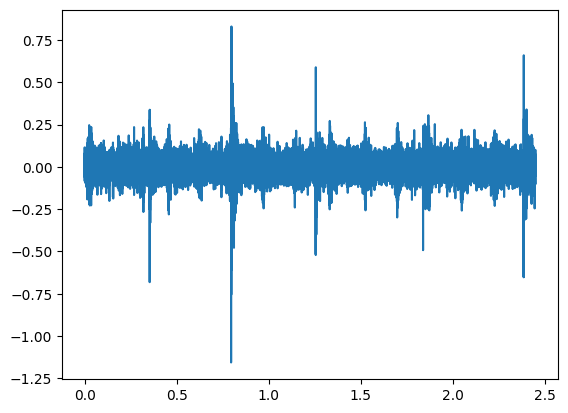

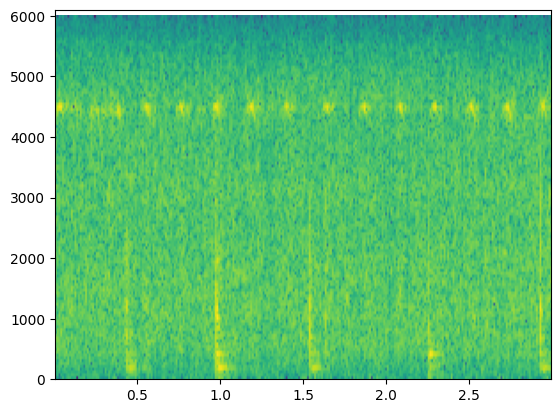

In [3]:
frequency = 44100
sample = 6
# region_dataset = train_dataset[sample]["audio"]["path"]
# print(f"Region: {region_dataset}")
label_dataset = train_dataset[sample]["label"]
print(f"Label: {label_dataset}")
# print(f"Region: {region_dataset}, Label: {label_dataset}")
scaled_audio = utils.audio_resampling_and_scaling(train_dataset[sample]["audio"]["array"],
                                                           original_frequency= train_dataset[sample]["audio"]["sampling_rate"],
                                                           target_frequency=frequency,
                                                           scaling_factor="normalize")


plt.plot(jnp.linspace(0, len(scaled_audio) / frequency, num=len(scaled_audio)), scaled_audio)
plt.show()

plt.specgram(train_dataset[sample]["audio"]["array"], Fs=train_dataset[sample]["audio"]["sampling_rate"], mode='magnitude')#, NFFT = frequency//100)
plt.ylim(0, 6100)
plt.show()

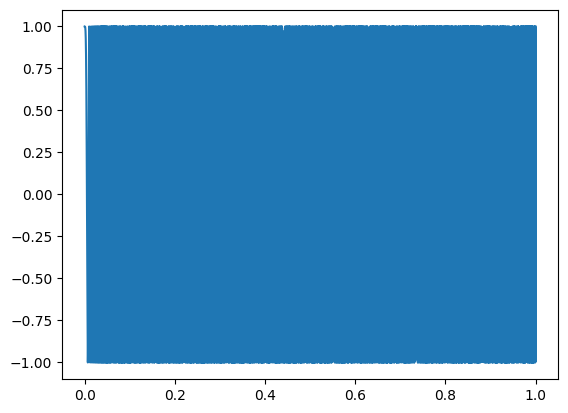

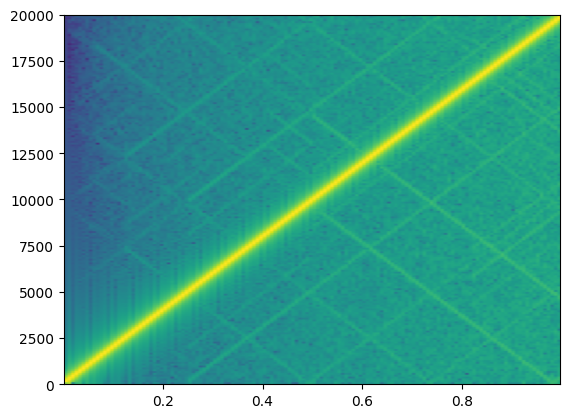

In [4]:
frequency = 44100

scaled_audio = chirp(jnp.linspace(0, 1, num=frequency), f0=0, f1=20e3, t1=1, method='linear')
plt.plot(jnp.linspace(0, len(scaled_audio) / frequency, num=len(scaled_audio)), scaled_audio)
plt.show()

plt.specgram(x = scaled_audio, Fs=frequency, mode='magnitude', NFFT = frequency//100)
plt.ylim(0, 20000)
plt.show()

In [5]:
reload(conversion_methods)

<module 'crusade.conversion_methods' from '/home/p306945/Projects/MALEFICENT/rfcx_snn/src/crusade/conversion_methods.py'>

In [6]:
num_neurons = 32
neuron_model = conversion_methods.resonate_and_fire_bank(num_neurons=num_neurons, freq_max=20000, debug=False, input_gain=10, damping_factor_scaling=1.45)
print(f"neuron damp: {neuron_model.damping_factors}")
print(f"neuron freq bins: {neuron_model.frequencies_bins}")
print(f"neuron freqs: {neuron_model.frequencies}")


neuron damp: [       nan -3206.147  -2962.0698 -2902.9917 -2879.4858 -2867.7444
 -2861.0344 -2856.8384 -2854.04   -2852.0798 -2850.6536 -2849.5833
 -2848.7595 -2848.1125 -2847.5945 -2847.1733 -2846.827  -2846.5376
 -2846.294  -2846.0874 -2845.91   -2845.7563 -2845.623  -2845.5066
 -2845.4036 -2845.313  -2845.2324 -2845.1604 -2845.0952 -2845.0374
 -2844.9846 -2844.9368]
neuron freq bins: [   20.      644.375  1268.75   1893.125  2517.5    3141.875  3766.25
  4390.625  5015.     5639.375  6263.75   6888.125  7512.5    8136.875
  8761.25   9385.625 10010.    10634.375 11258.75  11883.125 12507.5
 13131.875 13756.25  14380.625 15005.    15629.375 16253.75  16878.125
 17502.5   18126.875 18751.25  19375.625 20000.   ]
neuron freqs: [  332.1875   956.5625  1580.9375  2205.3125  2829.6875  3454.0625
  4078.4375  4702.8125  5327.1875  5951.5625  6575.9375  7200.3125
  7824.6875  8449.0625  9073.4375  9697.8125 10322.1875 10946.5625
 11570.9375 12195.3125 12819.6875 13444.0625 14068.4375 14692.

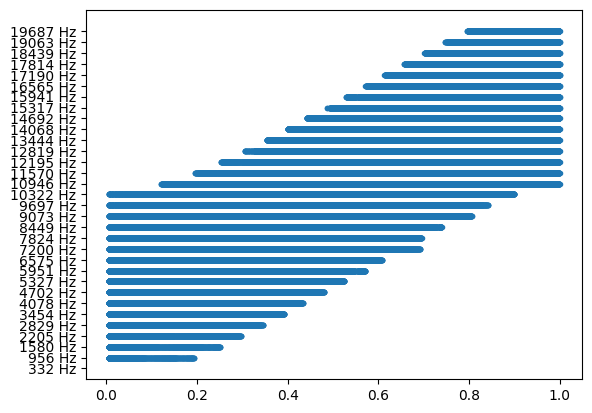

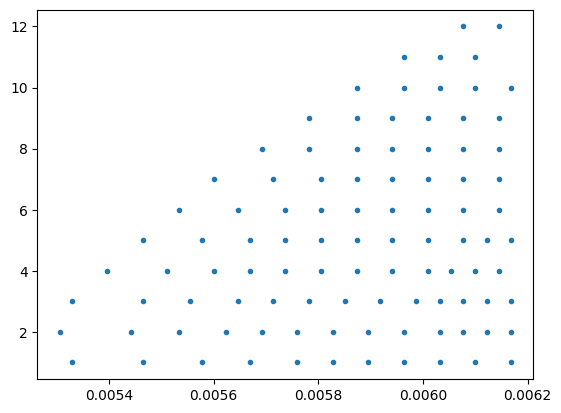

In [7]:

event_time, event_address  = neuron_model(scaled_audio, sampling_rate= frequency)
plt.plot(event_time, event_address, '.')
plt.ylim(-1, num_neurons+1)
plt.yticks(ticks=jnp.arange(0, num_neurons, 1), labels=[f"{int(f)} Hz" for f in neuron_model.frequencies])
plt.show()
# plt.savefig("event_plot.png")
plt.clf()
plt.plot(event_time[0:100], event_address[0:100], '.')
plt.show()
# plt.savefig("event_plot_100.png")
#plt.plot(x, y)
#plt.show()

In [10]:
dyn, maxi, mini = neuron_model.dynamic_range_test()

plt.plot(dyn)
plt.show()

KeyboardInterrupt: 